<a href="https://colab.research.google.com/github/choihu/everyones_deeplearning/blob/master/everyone's_deeplearning5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
n_fold = 10
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
df_pre = pd.read_csv('/content/wine.csv', header=None)
#df = df_pre.sample(frac=1)
df = df_pre.sample(frac=0.15)

In [0]:
data_set = df.values
X = data_set[:, 0:12]
Y = data_set[:, 12]

In [0]:
#MODEL_DIR = './model/'
#if not os.path.exists(MODEL_DIR):
#  os.mkdir(MODEL_DIR)

#modelpath= "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [0]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [0]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])
##history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss did not improve from 0.03802

Epoch 00002: val_loss did not improve from 0.03802

Epoch 00003: val_loss did not improve from 0.03802

Epoch 00004: val_loss did not improve from 0.03802

Epoch 00005: val_loss did not improve from 0.03802

Epoch 00006: val_loss did not improve from 0.03802

Epoch 00007: val_loss did not improve from 0.03802

Epoch 00008: val_loss did not improve from 0.03802

Epoch 00009: val_loss did not improve from 0.03802

Epoch 00010: val_loss did not improve from 0.03802

Epoch 00011: val_loss did not improve from 0.03802

Epoch 00012: val_loss did not improve from 0.03802

Epoch 00013: val_loss did not improve from 0.03802

Epoch 00014: val_loss did not improve from 0.03802

Epoch 00015: val_loss did not improve from 0.03802

Epoch 00016: val_loss did not improve from 0.03802

Epoch 00017: val_loss did not improve from 0.03802

Epoch 00018: val_loss did not improve from 0.03802

Epoch 00019: val_loss did not improve from 0.03802

Epoch 00020

In [0]:
#print("Accuracy: %.4f" % (model.evaluate(X, Y)[1]))
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

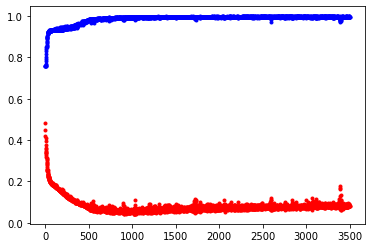

In [0]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()